<a href="https://colab.research.google.com/github/danhorsley/mud_front_end/blob/master/mud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUD Generator

### keep closed - run dictionaries cell within for code to work.  recursive backtracker walkthru if needed

In [0]:
#recursive backtracker
# The depth-first search algorithm of maze generation is frequently implemented using backtracking:

# Make the initial cell the current cell and mark it as visited
# While there are unvisited cells
# If the current cell has any neighbours which have not been visited
# Choose randomly one of the unvisited neighbours
# Push the current cell to the stack if it has more than one unvisited neighbor
# Remove the wall between the current cell and the chosen cell
# Make the chosen cell the current cell and mark it as visited
# Else if stack is not empty
# Pop a cell from the stack while the stack is not empty and the popped cell has no unvisited neighbors
# Make it the current cell

In [0]:
castle_dict = {'Sights':['a flagstone floor', 'stone block walls', 'a reinforced wooden door', 
                'narrow slit windows high on wall', 'castle banners', 'lanterns along the walls', 
                'racks with weapons sharpened spears', 'tables holding feasts','a vast fireplace'],
               'Sounds':['the clink of metal', 'hammer hitting steel', 'the hiss of steam', 
               'crackle of flame', 'the grinding rasp of metal against the granite sharpening wheel', 
               'chain links clinking', 'the quiet crumple sound of leather creasing', 
               'heavy boots against the stone floor', 'grunts'],
                'Smells':['the tang of metal', 'smoke', 'cold stone', 'wax melting', 'gunpowder and a whiff of cordite', 
                'soot', 'blood', 'polished wood', 'sweat'],
                'Touch':['an icy draft','the warm glow of a fire','death in the air'],
               'Paths': [' stone door', ' wooden door', ' passageway',' doorway'],
               'Up':[' stone staircase', ' a wooden ladder', 'a hatch'],
               'Down':[' stone staircase', ' a wooden ladder', 'a trap door'],
               'How' : ['runs', 'leads', 'goes', 'bears']}

forest_dict = {'Sights':['fallen trees', 'logs', 'branches', 'twigs', 'fallen leaves', 'ferns', 'underbrush', 'moss', 'brambles', 'thickets', 'ivy', 'berry bushes', 'pine needles', 'pine cones', 'acorns', 'insects', 'rabbits', 'birds', 'squirrels', 'lizards', 'mice', 'foxes', 'spider webs', 'deer'],
               'Sounds':['branches creaking', 'feet shuffling through detritus', 'squirrels chattering', 'leaves rustling', 'wind whistling around trunks', 'wind disturbing the leaves', 'birds singing', 'insects humming', 'insects churring', 'rustle of animals rooting in underbrush', 'scrabbling of lizards on tree bark'],
                'Smells':['sweet pines', 'wildflowers', 'an earthy smell', 'animal scents', 'rotting wood', 'fresh rain', 'scents on the wind', 'wood smoke', 'wild mint', 'wild herbs', 'decay', 'bogs', 'stagnant pools of water', 'dead animals',
                          'earthy air', 'sweet berries', 'nuts', 'wild onions', 'wild mint'],
                'Touch':['the kiss of falling leaves', 'uneven ground beneath your feet', 'a tangle of roots underfoot', 'the prickle of briars', 'twigs snagging at your hair', 'the tickle of hanging moss', 'a spider web\'s strands brushing your skin'],
               'Paths': [' muddy path', 'n overgrown foot path', ' dusty track',' hidden trail'],
               'Up':[' branch ladder', 'thick dangling vine'],
               'Down':[' muddy hole', ' slippery slope'],
               'How' : ['runs', 'leads', 'goes', 'points']}

mountain_dict = {'Sights':['uneven stone', 'crags', 'jagged cliffs', 'shale', 'scree', 'granite', 'moss', 
                            'a winding treeline', 'whispy clouds', 'mist in the valley below', 
                             'sheer ravines', 'a thundering waterfall', 'deep snow', 'hawks', 'eagles',
                              'ravens', 'falcons', 'owls', 'bighorn sheep', 'rock slides'],
               'Sounds':['wind whistling along the slopes', 'animal howls', 'rustling leaves', 
               'frothing waterfalls', 'water trickling into snow melt', 'scree shifting underfoot', 
               'rockfalls', 'birds calling', 'animals pattering through the underbrush', 'branches snapping'],
                'Smells':['pine needles', 'crisp air', 'clean water', 'earthy moss', 'rotting logs', 
                'wet rock', 'wildflower blossoms'],
                'Touch':[' the cold unyielding stone', 'a sharp breeze', 'dust getting in your eyes', 
                'spongy moss underfoot', 'prickling pine needles caught in your boot', 
                'slippery shale underfoot'],
               'Paths': [' rocky path', ' stony road', ' granite track',' slppery trail'],
               'Up':[' climbable rock face', ' rocky switchback'],
               'Down':[' climbable rock face', ' rocky switchback'],
               'How' : ['runs', 'leads', 'goes', 'points']}

sewers_dict = {'Sights':['curved cement walls', 'rusted metal grates', 'pipes', 'standing water',
                'graffiti', 'mold', 'mildew', 'stagnant water', 'waterlogged garbage',
                'the beam of a flashlifht in the distance'],
               'Sounds':['dripping water', 'splashes', 'squeaking rats', 'faint echos', 
               'footsteps', 'the noise of the city above', 'street sounds', 'gurgling water', 'running water'],
                'Smells':['something indescribably awful','raw sewage','noxious fumes',
                'fetid detritis', 'foul-smelling effluent','evil-smelling' ,'rank waste'],
                'Touch':['water seeping into your boots', 'cold water soaking your clothing', 
                'rats running over your boots', 'your hand brush a slimy wall', 
                'something brush against your legs'],
               'Paths': [' tunnel', ' raised walkway', 'n archway',' slppery trail'],
               'Up':[' manhole', ' ladder'],
               'Down':[' pipe', ' rocky switchback'],
               'How' : ['runs', 'leads', 'goes', 'branches off']}


city_dict = {'Sights':['cramped wooden stalls', 'a dirty water fountain', 'a blacksmith hammering'
                        'people rushing here and there','streets overflowing with life'],
               'Sounds':['frenzied haggling', 'serious bartering', 'sellers hawking wares', 'people calling out to friends',
                'laughter', 'chickens clucking', 'creaking wagons' , 'the clop of horse hooves'],
                'Smells':['spices', 'grilling meats', 'baking bread', 'sweat', 'smoke', 'over-ripe fruit',
                 'manure', 'leather', 'perfume', 'ale'],
                'Touch':['cobbles underfoot', 'the press of the crowd'],
               'Paths': [' alleyway', ' cobbled street', ' archway',' passageway'],
               'Up':[' stone staircase', ' ladder'],
               'Down':[' stone staircase', ' ladder'],
               'How' : ['runs', 'leads', 'goes', 'branches off']}

caves_dict = {'Sights':['stone walls', 'a dirt floor', 'tree roots', 'dead leaves', 'campfire remains',
                 'animal scat', 'old bones', 'bats sleeping', 'spiders', 'webs', 'insects', 'earthworms',
                  'stalactites hanging from the ceiling', 'stalagmites protruding from the floor'],
               'Sounds':['wind whistling around stone', 'the muffled sound of wind in trees outside', 
               'echoes', 'the skitter of animals', 'insects whirring', 'bat wings fluttering', 
               'water dripping', 'a campfire crackling'],
                'Smells':['animal musk', 'rotting vegetation', 'stale air', 'stagnant standing water',
                 'the briny smell of slimy lichen', 'woodsmoke' ],
                'Touch':[' the walls closing in around you', 'your hand scraping against the wall'],
               'Paths': [' mysterious archway', ' darker cave', ' tunnel',' passageway'],
               'Up':[' stone hole', ' ladder'],
               'Down':[' crevice', ' slippery slope'],
               'How' : ['runs', 'leads', 'goes', 'branches off']}

mines_dict = {'Sights':['rough rock walls', 'thick cracked support beams' , 'dust', 'rock crumbles', 
                'old broken picks', 'bits of chain', 'rusted nails', 'old rails for carts', 
                'a rusted broken handcart',  'pools of standing water', 'a dead canary'],
               'Sounds':['distant echos', 'boots on rock', 'loose stone crumbling', 'creaking', 
               'shifting timber', 'dripping water', 'amplified sounds from outside through the rock' ,
               'heavier breathing'],
                'Smells':['stale, moist air', 'cold stone', 'must', 'mildew', 'sweat'],
                'Touch':['cold, slippery rock against your hand', 'back pain from crouching down',
                 'the slip of perspiration down the back of your neck', 
                 'your knuckles grazing the rock'],
               'Paths': [' wooden archway', ' darker cave', ' tunnel',' track'],
               'Up':[' trap door', ' ladder'],
               'Down':[' crevice', ' trap door'],
               'How' : ['runs', 'leads', 'goes', 'branches off']}

dungeon_dict = {'Sights':['shadows', 'cells', 'stone walls', 'stone floors', 'filthy straw scattered across the floor', 
                'chains fixed to walls', 'rats', 'flickering torchlight', 'iron bars', 'spiders', 
                'beetles', 'bones',  'old empty barrels'],
               'Sounds':['weeping','iron bars slamming shut', 'the creak of leather', 'chains clinking', 
               'the squeak of rats foraging','the hiss of steam', 'the crack of a whip', 
               'rattling chains', 'labored breathing', 'iron doors swinging'],
                'Smells':['desperation','smoke','decay','cold stone','decay'],
                'Touch':['the depths calling to you','the pull of the abyss','the sweat running down your forehead',
                'slightly queasy','unusual'],
               'Paths': [' passageway', 'n ominous stone archway', ' tunnel',' narrow doorway'],
               'Up':[' trap door', ' ladder'],
               'Down':[' manhole', ' trap door'],
               'How' : ['runs', 'leads', 'goes', 'branches off']}


all_regions = {'in a castle':castle_dict, 'in a forest':forest_dict, 'on a mountain' : mountain_dict,
                'in the sewers' : sewers_dict, 'in a city':city_dict, 'in an endless cave': caves_dict,
                'in an old abandoned mine': mines_dict, 'in a dungeon': dungeon_dict}

### Room class and World class - generates 3D world and splits into regions before populating descriptions.  print render still works just splits out individual floors

In [0]:
class Room:
  def __init__(self, x = 0, y = 0, floor = 0, visited = 0):

    self.visited = visited
    self.n_to = None
    self.s_to = None
    self.e_to = None
    self.w_to = None
    self.u_to = None
    self.d_to = None
    self.x = x
    self.y = y
    self.floor = floor
    self.coords = [self.x,self.y,self.floor]
    self.id = f'{self.x}{self.y}{self.floor}'
    
    #placeholders
    self.description = ''
    self.region = 'in a castle'
    self.title = self.region + self.id

  

  
  def connect_rooms(self, connecting_room):
    entrance_dict = {(0,1,0): 'n_to', (0,-1,0): 's_to', (1,0,0): 'e_to', (-1,0,0): 'w_to', (0,0,1): 'u_to', (0,0,-1): 'd_to' }
    try:

      translation1 = (connecting_room.x - self.x, connecting_room.y - self.y, connecting_room.floor - self.floor)
      translation2 = (self.x - connecting_room.x, self.y - connecting_room.y, self.floor - connecting_room.floor) 
      
      setattr(self, entrance_dict[translation1], connecting_room)
      setattr(connecting_room, entrance_dict[translation2], self)
    except:
       return print("cannot connect these rooms")


  def update_exits(self):
    possible_directions = ['n_to','s_to', 'e_to',  'w_to',  'u_to',  'd_to']
    self.exits = {}
    for pd in possible_directions:
      if getattr(self, pd) is None:
        tf = False
      else:
        tf = True
      self.exits[pd] = tf


  def create_full_description(self):
    d_text = {'n_to' : 'north', 's_to' : 'south ', 'w_to' : 'west', 'e_to' : 'east',
                  'u_to': 'stairs up','d_to': 'stairs down'}
    
    cur_reg_dict = all_regions[self.region]
    sights = random.sample(cur_reg_dict['Sights'],2)
    smells = random.sample(cur_reg_dict['Smells'],2)
    sounds = random.sample(cur_reg_dict['Sounds'],2)
    feels = random.sample(cur_reg_dict['Touch'],2)
    paths = random.sample(cur_reg_dict['Paths'],4)
    hows = random.sample(cur_reg_dict['How'],4)

    self.update_exits()
    available_exits = [e for e in self.exits.keys() if self.exits[e] is not False]
    #print(available_exits)
    exit_text = ''
    counter = 0
    for t in available_exits:

      if t in ['n_to','s_to', 'e_to',  'w_to']:
        exit_text = exit_text + '  A' + paths[counter] + f' {hows[counter]} to the {d_text[t]}.'
      elif t=='u_to':
        exit_text = exit_text + '  A' +  random.choice(cur_reg_dict['Up']) + f' leads upwards.'
      elif t=='d_to':
        exit_text = exit_text + '  A' + random.choice(cur_reg_dict['Down']) + f' leads downwards.'
      counter += 1

    self.description = (f'''You are {self.region}.  You see {sights[0]} and 
                        {sights[1]}.  You can smell {smells[0]} and hear {sounds[0]}.
                          You feel {feels[0]}.  ''' + exit_text).replace('\n                        ','')



In [0]:
import random
class World:
  def __init__(self, x_dims = 10, y_dims = 10, floors = 2):

    self.x_dims = x_dims
    self.y_dims = y_dims
    self.floors = floors
    
    #make a grid of rooms populated with their respective co-ords
    #NOTE grid goes FLOOR, Y, X while COORDS goes X,Y,FLOOR
    self.grid = [None] * floors
    for f in range(floors):
      self.grid[f] = [None] * y_dims
      for i in range(y_dims):
        self.grid[f][i] = [None] * x_dims

    for f in range(floors):
      for i in range(y_dims):  #swap temp
        for j in range(x_dims):
          self.grid[f][i][j] = Room(j,i,f)
    
    #define some other useful attributes 
    #making grid for quick check of co_ords and neighbor translations
    self.check_grid = [[i,j] for i in range(x_dims) for j in range(y_dims)]
    self.neighbor_moves = [[1,0],[-1,0],[0,1],[0,-1]]
    


  def find_unvisited_neighbors(self,f=0):
    #first find neighbors
    current_neighbors = [[nm[0]+self.current_room.x, nm[1] + self.current_room.y] for nm in self.neighbor_moves]
    current_neighbors = [cn for cn in current_neighbors if cn in self.check_grid]
    self.current_unvisited_neighbors = [cn for cn in current_neighbors if self.grid[f][cn[1]][cn[0]].visited == 0]
    return self.current_unvisited_neighbors



  def make_path(self):
    """creates a maze for each floor using a recursive backtracker, 
    i.e. if every neighbor of the current room has been visited you pop the stack 
    to go back to the last room where there was an unvisited neighbor"""
    plot_list = []
    for f in range(self.floors):
      self.current_room = random.choice(random.choice(self.grid[f]))
      self.current_room.visited = 1

      self.total_unvisited = (self.x_dims * self.y_dims) - 1
      plot_list.append(self.current_room.coords)
      stack = [self.current_room]
      while self.total_unvisited != 0:
        old_room = self.current_room
        if self.find_unvisited_neighbors(f) != []:
          random_neighbor = random.choice(self.find_unvisited_neighbors(f))
          
          self.current_room = self.grid[f][random_neighbor[1]][random_neighbor[0]]
          plot_list.append(self.current_room.coords)
          if len(self.find_unvisited_neighbors(f)) >= 1:
            stack = [self.current_room] + stack
          self.current_room.connect_rooms(old_room)
          self.current_room.visited = 1
          self.total_unvisited -=1
          #print(self.total_unvisited)
        elif len(stack) !=0:
          #print('pop')
          #pop the stack
          self.current_room = stack[0]
          plot_list.append(self.current_room.coords)
          stack = stack[1:]
    return plot_list


  def print_rooms(self):
      '''
      Print the rooms in room_grid in ascii characters.
      '''
      for f in range(self.floors):
        # Add top border
        str = "# " * ((3 + self.x_dims * 5) // 2) + "\n"

        # The console prints top to bottom but our array is arranged
        # bottom to top.
        #
        # We reverse it so it draws in the right direction.
        reverse_grid = list(self.grid[f]) # make a copy of the list
        reverse_grid.reverse()
        for row in reverse_grid:
            # PRINT NORTH CONNECTION ROW
            str += "#"
            for room in row:
                if room is not None and room.n_to is not None:
                    str += "  |  "
                else:
                    str += "     "
            str += "#\n"
            # PRINT ROOM ROW
            str += "#"
            for room in row:
                if room is not None and room.w_to is not None:
                    str += "-"
                else:
                    str += " "
                if room is not None:
                    str += f"{room.id}".zfill(3)
                else:
                    str += "   "
                if room is not None and room.e_to is not None:
                    str += "-"
                else:
                    str += " "
            str += "#\n"
            # PRINT SOUTH CONNECTION ROW
            str += "#"
            for room in row:
                if room is not None and room.s_to is not None:
                    str += "  |  "
                else:
                    str += "     "
            str += "#\n"

        # Add bottom border
        str += "# " * ((3 + self.x_dims * 5) // 2) + "\n"

        # Print string
        print(str)


  def create_regions(self,o = None,plot_list = []):
        """splits the map into regions using an origin point
            o is the origin point for the region split"""
        coords_to_region = {}
        if o is None:
          o = [self.x_dims // 2, self.y_dims // 2,  self.floors // 2]
        for f in range(self.floors):
          for i in range(self.y_dims):
            for j in range(self.x_dims):
              rc = self.grid[f][i][j]
              if rc.coords[0] >= o[0] and rc.coords[1] >= o[1] and rc.coords[2] >= o[2]:
                  rc.region = 'in a castle'
              if rc.coords[0] >= o[0] and rc.coords[1] >= o[1] and rc.coords[2] < o[2]:
                  rc.region = 'in a dungeon'
              if rc.coords[0] >= o[0] and rc.coords[1] < o[1] and rc.coords[2] >= o[2]:
                  rc.region = 'in a city'
              if rc.coords[0] >= o[0] and rc.coords[1] < o[1] and rc.coords[2] < o[2]:
                  rc.region = 'in the sewers'
              if rc.coords[0] < o[0] and rc.coords[1] < o[1] and rc.coords[2] >= o[2]:
                  rc.region = 'in a forest'
              if rc.coords[0] < o[0] and rc.coords[1] < o[1] and rc.coords[2] < o[2]:
                  rc.region = 'in an endless cave'
              if rc.coords[0] < o[0] and rc.coords[1] >= o[1] and rc.coords[2] >= o[2]:
                  rc.region = 'on a mountain'
              if rc.coords[0] < o[0] and rc.coords[1] >= o[1] and rc.coords[2] < o[2]:
                  rc.region = 'in an old abandoned mine'
              #coords_to_region[f'{j},{i},{f}'] = rc.region
        #return coords_to_region
    
  def populate_descriptions(self, o = None):
    ret = self.create_regions(o)
    for f in range(self.floors):
          for i in range(self.y_dims):
            for j in range(self.x_dims):
                self.grid[f][i][j].create_full_description()
    return ret

  def join_floors(self, stairwell = None):
    for f in range(self.floors-1):
      if stairwell is None:
        random_point = [random.choice(range(self.x_dims)), random.choice(range(self.x_dims))]
        self.grid[f][random_point[1]][random_point[0]].connect_rooms(self.grid[f+1][random_point[1]][random_point[0]])
      else:
        self.grid[f][stairwell[1]][stairwell[0]].connect_rooms(self.grid[f+1][stairwell[1]][stairwell[0]])
    

### Test

In [0]:
#make a new word with specified dimensions
my_world = World(10,8,8)
my_plot_list = my_world.make_path()
my_world.populate_descriptions()

In [0]:
#check description of random room
p = [random.choice(range(my_world.floors)),random.choice(range(my_world.y_dims)),random.choice(range(my_world.x_dims))]
my_world.grid[p[0]][p[1]][p[2]].region, my_world.grid[p[0]][p[1]][p[2]].description

('in the sewers',
 'You are in the sewers.  You see mold and graffiti.  You can smell evil-smelling and hear gurgling water.  You feel water seeping into your boots.    A slppery trail goes to the east.  A tunnel runs to the west.')

In [0]:
my_world.join_floors([5,5])
my_world.populate_descriptions()
print(my_world.grid[3][5][5].description)
my_world.grid[4][5][5].description

You are in a dungeon.  You see beetles and iron bars.  You can smell desperation and hear labored breathing.  You feel the sweat running down your forehead.    A passageway goes to the south .  An ominous stone archway runs to the east.  A trap door leads upwards.  A trap door leads downwards.


'You are in a castle.  You see a vast fireplace and lanterns along the walls.  You can smell smoke and hear chain links clinking.  You feel an icy draft.    A passageway leads to the west.  Aa hatch leads upwards.  A stone staircase leads downwards.'

In [0]:
my_world.print_rooms()

# # # # # # # # # # # # # # # # # # # # # # # # # # 
#                                                  #
# 070--170  270--370--470--570--670--770  870--970 #
#  |    |    |              |         |         |  #
#  |    |    |              |         |         |  #
# 060  160--260  360--460--560  660  760  860--960 #
#  |              |              |    |    |    |  #
#  |              |              |    |    |    |  #
# 050  150--250--350  450--550--650--750  850  950 #
#       |              |                   |    |  #
#       |              |                   |    |  #
# 040--140  240--340  440--540  640--740--840  940 #
#  |         |              |              |    |  #
#  |         |              |              |    |  #
# 030--130  230--330--430  530--630--730  830  930 #
#  |    |    |         |              |    |       #
#  |    |    |         |              |    |       #
# 020  120  220--320  420--520--620  720  820--920 #
#  |    |                   |         |       

### render using matplotlib - non_interactive

In [0]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_dict = {'in a castle' : '#6C3483','in a dungeon' : '#424949','in a city' : '#99A3A4',
                'in the sewers' : '#B9770E','in a forest' : '#145A32' ,
                'in an endless cave' : '#641E16','on a mountain' : '#3498DB','in an old abandoned mine' : '#F4D03F'}

def render_map_3d(world): #, e_init = 30, az_init=10):
        fig = plt.figure(figsize=(12,12/1.618))
        ax = fig.add_subplot(111, projection='3d')

        direction_dic = {'n_to' : [0,1,0], 's_to' : [0,-1,0], 'w_to' : [1,0,0], 'e_to' : [-1,0,0],
                        'u_to' : [0,0,1], 'd_to' : [0,0,-1]}
        all_points = []
        for floor in world.grid:
          for row in floor:
              for room in row:
                room.update_exits()
                for exit in room.exits:
                  if room.exits[exit]:
                      old_point = room.coords#[:2]
                      new_point = [(i+j) for i,j in  zip(old_point,direction_dic[exit])]
                      region_color = color_dict[room.region]
                      ax.plot([old_point[0],new_point[0]], [old_point[1],new_point[1]],[old_point[2],new_point[2]], region_color)
                      #ax.view_init(e_init,az_init)
                      all_points.append([old_point,room.region])
                      all_points.append([new_point,room.region])
        
        ## code for editor is you want to save down render
        # strFile = 'map_plot.png'
        # if os.path.isfile(strFile):
        #     os.remove(strFile)
        # plt.savefig(strFile)
        #plt.show()
        return all_points,ax


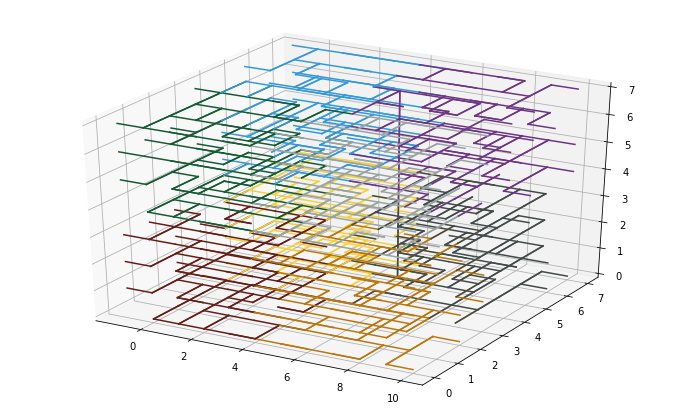

In [0]:
points,ax = render_map_3d(my_world)

## Interactive 3D render

In [0]:
#this traced our route during the maze creation
len(my_plot_list)

1019

In [0]:
#adding the region to each point
for p in my_plot_list:
  _ = my_world.grid[p[2]][p[1]][p[0]].region
  p.append(_)
  #print(_)

import plotly_express as px
#making interactive plot using plotly express
frame = pd.DataFrame(my_plot_list, columns = ['x','y','z','region','dupe'])
fig = px.line_3d(frame, x="x", y="y", z="z", color='region')
fig.show()

## Items

In [0]:
weapons = ['dagger', 'katana', 'knife', 'longsword', 'sabre', 'shortsword',
            'rapier', 'battle axe','club','flail','mace','quarterstaff','war hammer',
            'yo-yo','frisbee', 'boomerang']

wearables = ['robe', 'gloves', 'ring', 'amulet', 'necklace', 'boots', 'belt', 'cloak',
              'shirt','jeans', 't-shirt', 'sneakers']

skill = ['speed','strength','power', 'skill', 'invisibility','persuasion',
            'thought','nothing in particular', 'who knows what', 'mystery', 'destiny']

nouns = weapons + wearables

In [0]:
import random
class item:
  def __init__(self, name=None, item_room = None, owner = None):
    item.name = name
    item.item_room = item_room
    item.owner = owner 

In [0]:
class item_set:
  def __init__(self):
    self.item_dict = {}
    
  def gen_item(self):
    my_string = f'{random.choice(nouns)} of {random.choice(skill)}'
    self.item_dict[len(self.item_dict.keys())] = item(my_string)

In [0]:
items = item_set()
items.item_dict

{}

In [0]:
items.gen_item()
items.gen_item()
items.item_dict

{0: <__main__.item at 0x7f3c19fb0be0>, 1: <__main__.item at 0x7f3c19fb06d8>}

In [0]:
items.item_dict[1].name, items.item_dict[0].name

('shirt of thought', 'shirt of thought')

In [0]:
item_list

NameError: ignored